In [2]:
import os
import sys
import json
from pathlib import Path
sys.path.append(os.path.abspath('./TrackEval'))
sys.path.append(os.path.abspath('./src'))

import pandas as pd

In [3]:
from dataset import df_train

from trackeval import Evaluator, datasets, metrics

In [35]:
# take sample of gt
sample_dir = Path("./datasets/my_sample/gt/MOT20-train/MOT20-02/gt")
sample_dir.mkdir(exist_ok=True, parents=True)


df_sample = df_train.query('vid == "02" & fnum <= 1000 ') \
        .drop(["vid"], axis=1) \
        .query("`class` == 1 | `class` == 7")
        
df_sample['class'] = 1

df_sample.to_csv(sample_dir/"gt.txt", header=None, index=None)

In [36]:
# move it to
TRACKERS_TO_EVAL = "F"

tracker_dir = Path(f"./datasets/my_sample/trackers/MOT20-train/{TRACKERS_TO_EVAL}/data")
tracker_dir.mkdir(exist_ok=True, parents=True)

df_tracker = pd.read_csv("a.csv").drop(['Unnamed: 0'], axis=1)
df_tracker.to_csv(tracker_dir / 'MOT20-02.txt', header=None, index=None)

In [37]:
from constants import DATA_DIR

In [38]:
dataset_config = {
    "GT_FOLDER": str(DATA_DIR / "my_sample/gt"),  
    "TRACKERS_FOLDER": str(DATA_DIR / "my_sample/trackers"),
    "TRACKERS_TO_EVAL": TRACKERS_TO_EVAL,
    "SEQMAP_FILE": str(DATA_DIR / "my_sample/gt/seqmaps/MOT20-train.txt"), 
    "BENCHMARK": "MOT20",  # ✅ Keep MOT20 format
}

dataset = datasets.MotChallenge2DBox(dataset_config)


MotChallenge2DBox Config:
GT_FOLDER            : /home/aliaagheis/projects/Fawary-Competition-surveillance-for-retail-stores-/datasets/my_sample/gt
TRACKERS_FOLDER      : /home/aliaagheis/projects/Fawary-Competition-surveillance-for-retail-stores-/datasets/my_sample/trackers
TRACKERS_TO_EVAL     : F                             
SEQMAP_FILE          : /home/aliaagheis/projects/Fawary-Competition-surveillance-for-retail-stores-/datasets/my_sample/gt/seqmaps/MOT20-train.txt
BENCHMARK            : MOT20                         
OUTPUT_FOLDER        : None                          
CLASSES_TO_EVAL      : ['pedestrian']                
SPLIT_TO_EVAL        : train                         
INPUT_AS_ZIP         : False                         
PRINT_CONFIG         : True                          
DO_PREPROC           : True                          
TRACKER_SUB_FOLDER   : data                          
OUTPUT_SUB_FOLDER    :                               
TRACKER_DISPLAY_NAMES : None         

In [39]:
metric = metrics.HOTA()
evaluator = Evaluator()

# Run evaluation
result = evaluator.evaluate([dataset], [metric])


Eval Config:
USE_PARALLEL         : False                         
NUM_PARALLEL_CORES   : 8                             
BREAK_ON_ERROR       : True                          
RETURN_ON_ERROR      : False                         
LOG_ON_ERROR         : /home/aliaagheis/projects/Fawary-Competition-surveillance-for-retail-stores-/TrackEval/error_log.txt
PRINT_RESULTS        : True                          
PRINT_ONLY_COMBINED  : False                         
PRINT_CONFIG         : True                          
TIME_PROGRESS        : True                          
DISPLAY_LESS_PROGRESS : True                          
OUTPUT_SUMMARY       : True                          
OUTPUT_EMPTY_CLASSES : True                          
OUTPUT_DETAILED      : True                          
PLOT_CURVES          : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on MotChallenge2DBox dataset using the following metrics: HOTA, Count


Evaluating F

4 eval_sequence

<Figure size 640x480 with 0 Axes>

In [13]:
df_train[df_train['class'] == 7]

,fnum,id,x,y,w,h,conf,class,visibility,vid
96224,1,162,936,1,56,118,0,7,0.739050,02
96225,2,162,936,1,56,117,0,7,0.733720,02
96226,3,162,937,1,56,117,0,7,0.721380,02
96227,4,162,938,1,55,117,0,7,0.711560,02
96228,5,162,939,1,55,117,0,7,0.698550,02
...,...,...,...,...,...,...,...,...,...,...
749961,3311,1208,1229,1,53,95,0,7,0.000000,05
749962,3312,1208,1229,1,53,95,0,7,0.005015,05
749963,3313,1208,1229,1,53,96,0,7,0.007446,05
749964,3314,1208,1229,1,53,96,0,7,0.009928,05


In [14]:
from utils import show_gt_frame

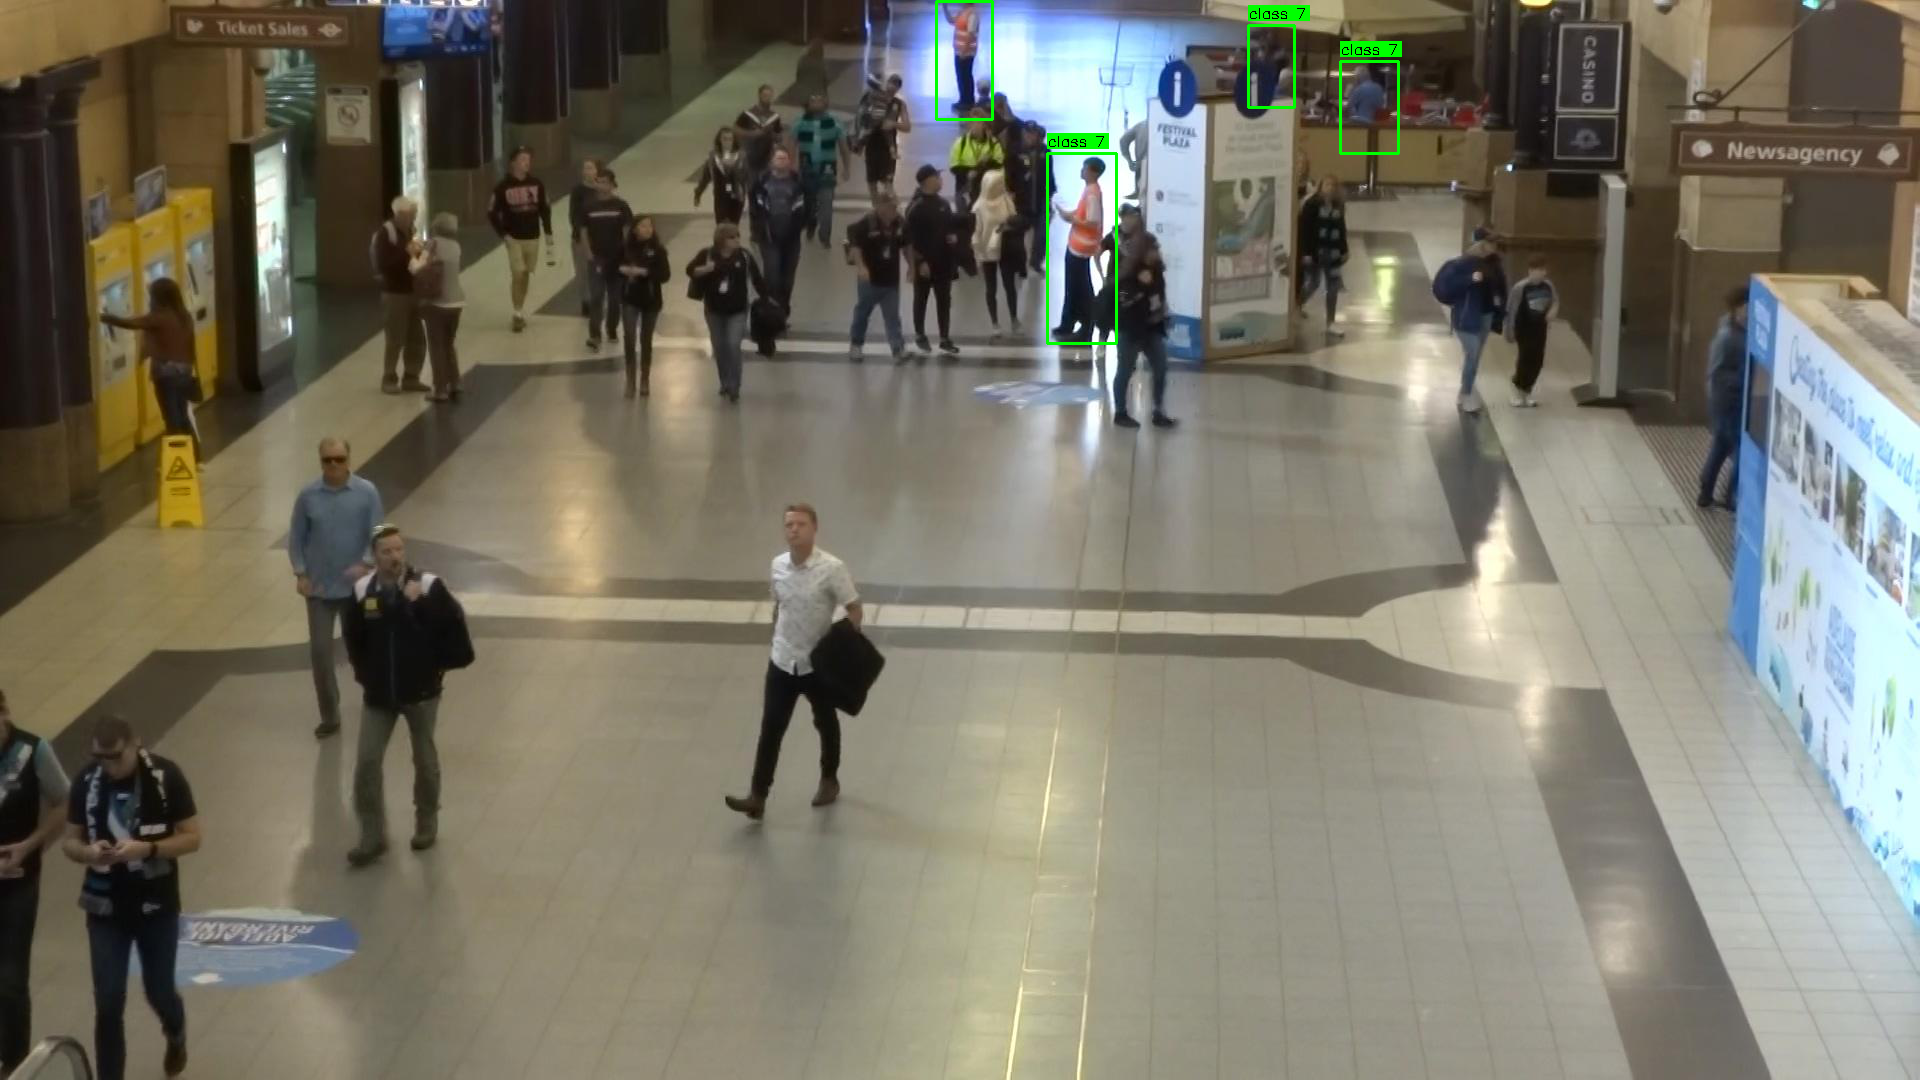

In [19]:
from PIL import Image
Image.fromarray(show_gt_frame("02", 1, df_train[df_train['class'] == 7]))